In [1]:
import pandas as pd
import numpy as np

Column_names = ['poisonous','cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
df = pd.read_csv("C:/Users/Lenovo/Desktop/30_Project/agaricus-lepiota.data", delimiter = ",", names = Column_names)
print(df.head())
df.shape[0]
df.dtypes

  poisonous cap-shape cap-surface cap-color bruises odor gill-attachment  \
0         p         x           s         n       t    p               f   
1         e         x           s         y       t    a               f   
2         e         b           s         w       t    l               f   
3         p         x           y         w       t    p               f   
4         e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         

poisonous                   object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [63]:
df = df.replace ('?', np.nan)
# df = df.drop(columns = ['veil-type'])
count_question_marks = (df == '?').sum().sum()
print (count_question_marks)
nan_count_total = df.isna().sum().sum()
print(f"Total number of NaN values in the DataFrame: {nan_count_total}")

y_dummies = pd.get_dummies(df['poisonous'],drop_first = True)
y_dummies = y_dummies.rename(columns={'p': 'poisonous'})
print(y_dummies)
print (df.shape)

0
Total number of NaN values in the DataFrame: 2480
      poisonous
0          True
1         False
2         False
3          True
4         False
...         ...
8119      False
8120      False
8121      False
8122       True
8123      False

[8124 rows x 1 columns]
(8124, 22)


In [65]:
y= y_dummies
y = y.values.ravel()
X = df.drop('poisonous', axis = 1)
count_nan = X.isna().sum().sum()
print (count_nan)

2480


In [67]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
ordinal_feature = ['ring-number', 'population']
ordinal_categories = [['n', 'o', 't'], ['y','v','s','n','c','a']]
categorical_feature = X.columns.difference(ordinal_feature)

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_categories), ordinal_feature),
        ('cat', categorical_transformer, categorical_feature) 
    ])

In [69]:
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_other, y_other)
y_dummy_pred = dummy_clf.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_dummy_pred)
print(f"Baseline Accuracy (most frequent class): {baseline_accuracy:.4f}")
print (y)


Baseline Accuracy (most frequent class): 0.5200
[ True False False ... False  True False]


In [87]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import pandas as pd 

models = {
    "LogReg":LogisticRegression,
    "RF":RandomForestClassifier,
    "XGBoost":XGBClassifier,
    "SVC": SVC
}

param_grids = {
        'C': [ 0.01,  0.1],
        "kernel": ['rbf','linear']
    }
best_model_overall, predict_value, true_value, model_name, best_params, test_scores, mean_test_score, std_test_score = machine_learning_pipeline(
        "SVC", models, param_grids, X, y, preprocessor
    )
print( model_name, best_params, test_scores, mean_test_score, std_test_score)

SVC {'kernel': 'linear', 'C': 0.1} [1.0, 1.0, 0.9993846153846154, 1.0] 0.9998461538461538 0.00026646935501057825


In [89]:
print(predict_value)
print(true_value)

[array([ True, False, False, ...,  True, False, False]), array([False,  True,  True, ...,  True,  True,  True]), array([ True, False,  True, ..., False, False,  True]), array([ True, False,  True, ...,  True, False,  True])]
[array([ True, False, False, ...,  True, False, False]), array([False,  True,  True, ...,  True,  True,  True]), array([ True, False,  True, ..., False, False,  True]), array([ True, False,  True, ...,  True, False,  True])]


In [91]:
whole_test_sets = pd.DataFrame()
for i in range(3):
    data_set = pd.concat ([#pd.DataFrame(test_set[i]).reset_index (drop=True),
                           pd.DataFrame(true_value[i]).reset_index (drop=True),
                           pd.DataFrame(predict_value[i]).reset_index (drop=True)],axis = 1)
    whole_test_sets = pd.concat([whole_test_sets, data_set], axis = 0)
whole_test_sets.columns = ['y_true', 'y_pred']
acc_score = accuracy_score(whole_test_sets['y_true'], whole_test_sets['y_pred'])
print(whole_test_sets)
print (acc_score)

      y_true  y_pred
0       True    True
1      False   False
2      False   False
3      False   False
4      False   False
...      ...     ...
1620    True    True
1621   False   False
1622   False   False
1623   False   False
1624    True    True

[4875 rows x 2 columns]
0.9997948717948718


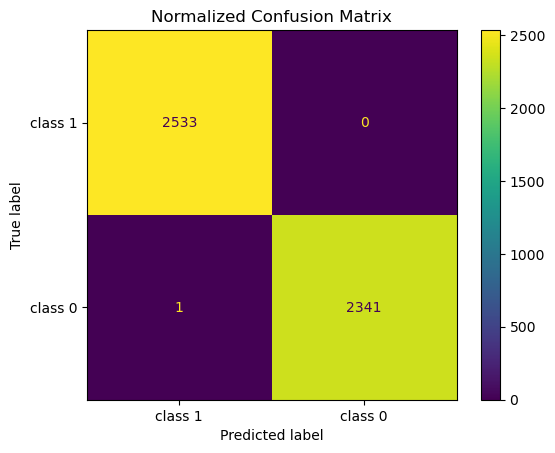

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(whole_test_sets['y_true'], whole_test_sets['y_pred'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["class 1", "class 0"])
disp.plot(cmap="viridis")
plt.title(f"Normalized Confusion Matrix")
plt.savefig ("confusion_matrix.png", dpi = 300)
plt.show()

In [71]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid

def ML_pipeline_kfold_SVC(X, y, random_state, n_folds):
    # Create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # Splitter for cross-validation
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=random_state)
    
    # Pipeline with preprocessing and SVC
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('svc', SVC(probability=True))
    ])
    # Parameter grid with step name prefixed
    param_grid = {
        "svc__C": [1e-2, 1e0, 1e2], 
        "svc__kernel": ["rbf"]
    }
    
    # Prepare GridSearchCV
    grid = GridSearchCV(pipe, param_grid=param_grid, cv=kf, return_train_score=True, n_jobs=-1, verbose=True)
    
    # Perform k-fold CV on X_other
    grid.fit(X_other, y_other)
    
    # Return the grid search results and test set
    return grid, X_test, y_test

# Call the function
grid, X_test, y_test = ML_pipeline_kfold_SVC(X, y, random_state=42, n_folds=4)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


In [43]:
from sklearn.metrics import accuracy_score

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
test_score = accuracy_score(y_test, y_pred)
print(f"Test Accuracy Score: {test_score:.4f}")

Test Accuracy Score: 1.0000


Feature Importances:


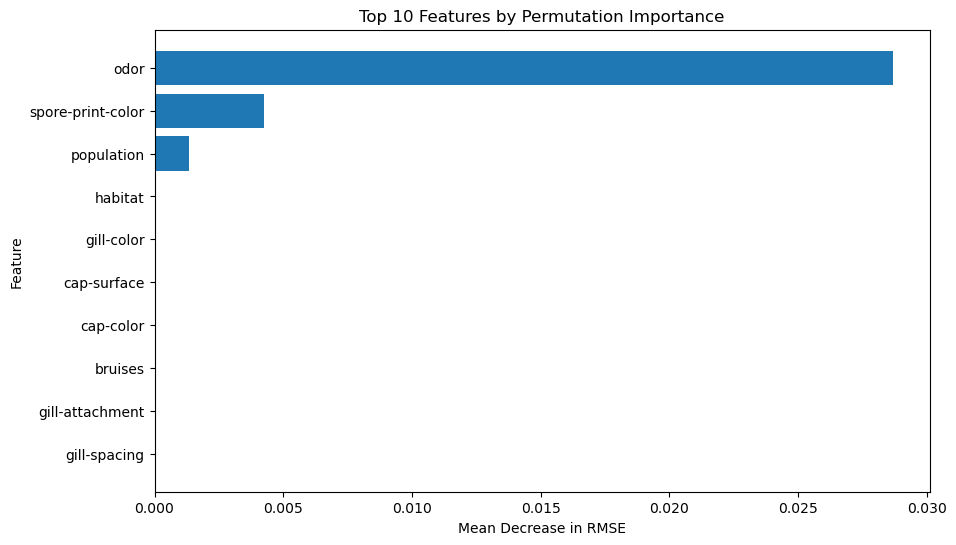

In [27]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
best_model = grid.best_estimator_
perm_importance = permutation_importance(
    best_model, X_test, y_test, n_repeats=10, random_state=42, scoring="accuracy"
)

feature_names = X_test.columns if hasattr(X_test, 'columns') else [f"Feature {i}" for i in range(X_test.shape[1])]

print("Feature Importances:")

sorted_idx = perm_importance.importances_mean.argsort()[-10:][::-1]
top_features = feature_names[sorted_idx]
top_importances = perm_importance.importances_mean[sorted_idx]
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, align='center')
plt.xlabel('Mean Decrease in RMSE')
plt.ylabel('Feature')
plt.title('Top 10 Features by Permutation Importance')
plt.gca().invert_yaxis()
plt.show()

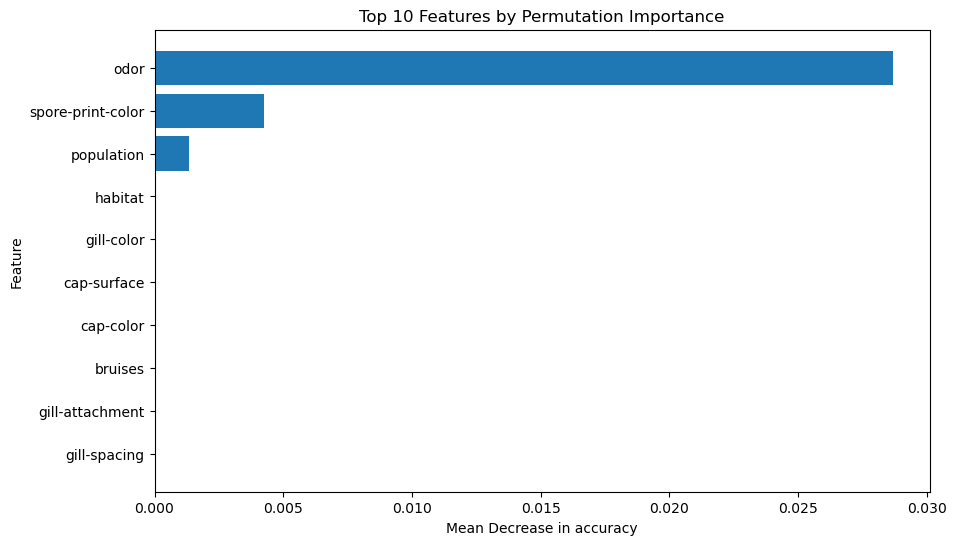

In [37]:
sorted_idx = perm_importance.importances_mean.argsort()[-10:][::-1]
top_features = feature_names[sorted_idx]
top_importances = perm_importance.importances_mean[sorted_idx]
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, align='center')
plt.xlabel('Mean Decrease in accuracy')
plt.ylabel('Feature')
plt.title('Top 10 Features by Permutation Importance')
plt.gca().invert_yaxis()
plt.savefig("permutation_importance.png", dpi=300)
plt.show()


In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import pandas as pd
models = {
    "LogReg":LogisticRegression,
    "RF":RandomForestClassifier,
    "XGBoost":XGBClassifier,
    "SVC": SVC
}
param_grids = {
        "learning_rate": [0.01, 0.1, 0.2],
        "n_estimators": [50, 100],
        "max_depth": [3, 5, 7]
    }
print( machine_learning_pipeline("XGBoost", models, param_grids, X, y, preprocessor))


KeyboardInterrupt

